### Comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories.

Dataset from Kaggle:
https://www.kaggle.com/datasets/lava18/google-play-store-apps


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sneak Peak at the dataset

In [2]:
df= pd.read_csv('D:\CSV\data Science Proj 1-app_market\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Removing duplicates

In [6]:
# checking number of duplicates in App column
df.duplicated(subset='App', keep='first').sum() 

1181

In [7]:
df.drop_duplicates(subset="App", inplace=True)

In [8]:
df.duplicated(subset='App', keep='first').sum() 

0

## Removing missing values

In [9]:
# print(df["Android Ver"].value_counts())
df= df[ df["Android Ver"].notna() ]   #---- works
df= df[ df["Current Ver"].notna() ]

df["Current Ver"].isnull().sum()


0

In [10]:
# print(df["Installs"].value_counts())
df= df[ df["Installs"].notna() ] 
df= df[ df["Installs"]!="Free" ]

In [11]:
print('Number of apps in the dataset : ' , len(df))

Number of apps in the dataset :  9649


## Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## converting data types-
 to float, date, ordinal groups for Android ver:
1. Convert all app sizes to MB
2. Remove '+' from 'Number of Installs' to make it numeric
3. Convert all review text to English language using Google Translator library
4. rating, reviews, price to float and int



In [13]:
print(df["Installs"].value_counts())

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64


In [14]:
# - Installs : Remove + and ,

df["Installs"] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)  #here "100" will remain as "100"
df["Installs"] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)  
df['Installs'] = df['Installs'].apply(lambda x: int(x))  #now converting string to int

In [15]:
print(df["Size"].value_counts())

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64


In [16]:
# - Size : Remove 'M', Replace 'k' and divide by 10^-3 to convert everything to MB
#df['Size'] = df['Size'].fillna(0)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))

In [17]:
print(df["Price"].value_counts())

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64


In [18]:
df["Price"] =df["Price"].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)

df["Price"]= df["Price"].apply(lambda x: float(x))

In [19]:
print(df["Reviews"].value_counts())

0         592
1         271
2         213
3         170
4         137
         ... 
157506      1
351254      1
49211       1
88860       1
398307      1
Name: Reviews, Length: 5328, dtype: int64


In [20]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [21]:
print(df["Type"].value_counts())

Free    8895
Paid     753
Name: Type, dtype: int64


In [22]:
# df["Type"]= df["Type"].apply(lambda x: 'NaN' if str(x)=='' else str(x) )
# df["Type"]= pd.factorize(df["Type"])[0]
# print(df["Type"].value_counts())
# print(df["Type"].isnull().sum())

In [23]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Basic EDA

In [24]:
plt.style.use('ggplot')
import seaborn as sns
color = sns.color_palette()

Text(0.5, 1.0, 'Count of app in each category')

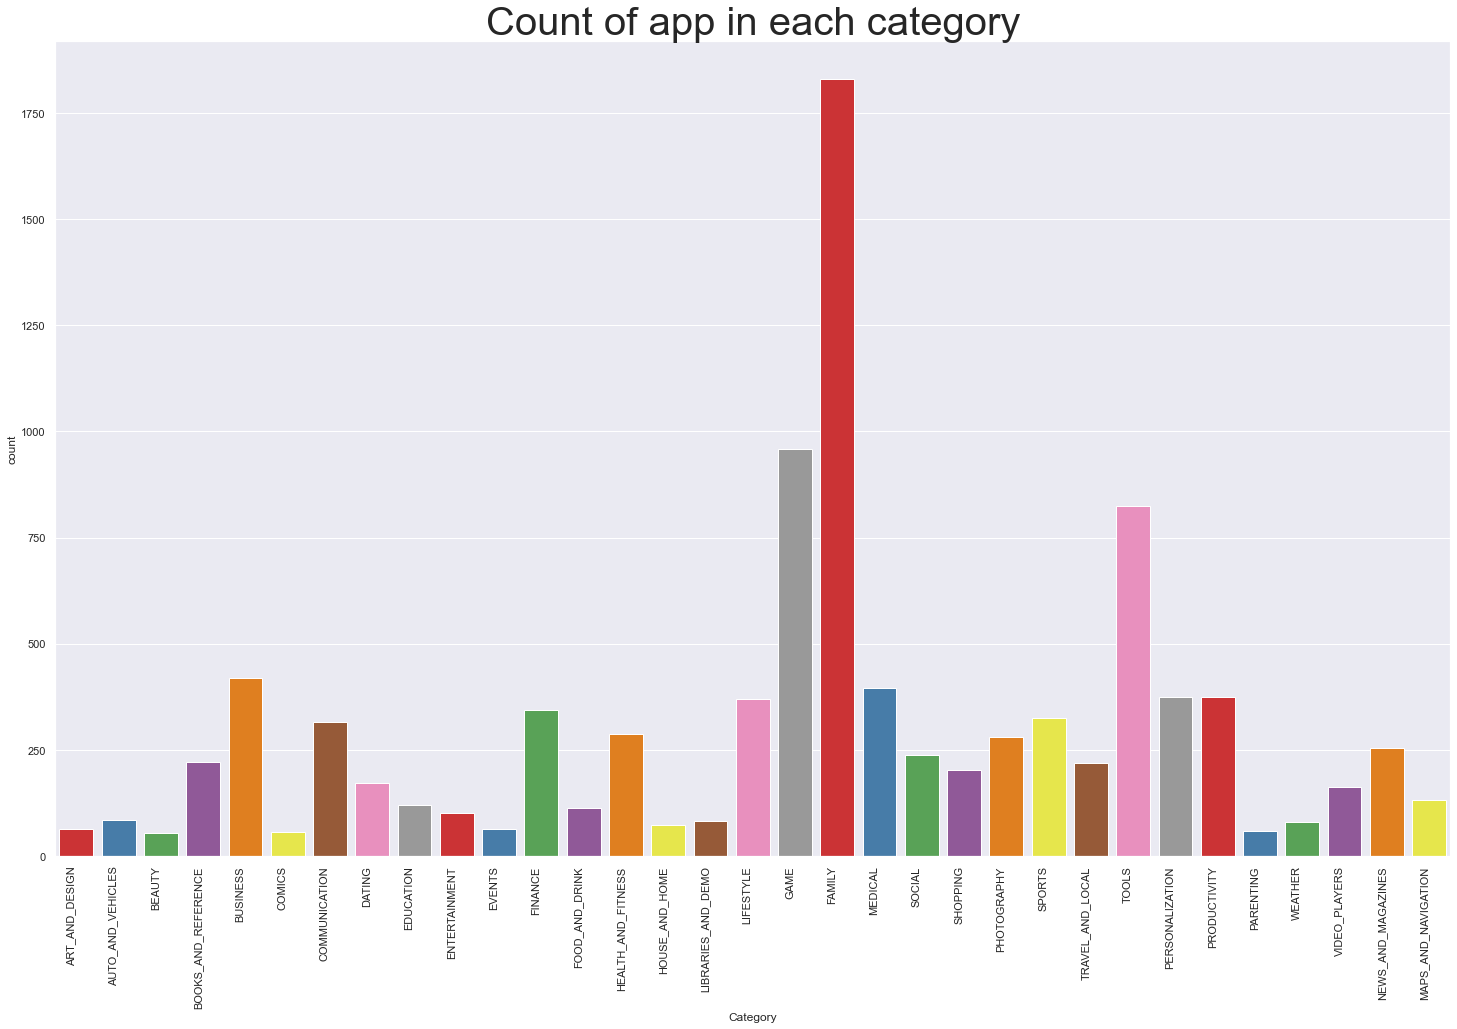

In [43]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 40)

Most number of apps are in categories: Family, Game, Business, tools, medical and least are: art_and_design, beauty,comics, events, parenting.

# Android market breakdown
Which category has the highest share of (active) apps in the market?

In [26]:
!pip install plotly
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set(rc={'figure.figsize':(25,15)})

import plotly.figure_factory as ff


In [27]:
import plotly.express as px
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)
# print(number_of_apps_in_category)
fig = px.pie(df, values=number_of_apps_in_category.values, names=number_of_apps_in_category.index, 
             title='Share of app categories in market')
fig.show()




double clicking on any legend dissapears it from pie chart<br>
Family and Game apps have the highest market prevelance.<br>
Interestingly, Tools, Business and Medical apps are also catching up.

## Average rating of apps
Do any apps perform really good or really bad?

In [28]:
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.173321123321126


Generally, most apps do well with an average rating of **4.17**.

Let's break this down and inspect if we have categories which perform exceptionally good or bad.

## App ratings across categories - One Way Anova Test
ONe way Anova test : im interested in finding if there is difference in category wise ratings

In [29]:
df.groupby(["Category", "App"])["Rating"].mean()

Category        App                                                                              
ART_AND_DESIGN  350 Diy Room Decor Ideas                                                             4.5
                3D Color Pixel by Number - Sandbox Art Coloring                                      4.4
                AJ Styles HD Wallpapers                                                              4.8
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper                                    4.0
                Ai illustrator viewer                                                                3.4
                                                                                                    ... 
WEATHER         Yahoo Weather                                                                        4.4
                Yahoo! Weather for SH Forecast for understanding the approach of rain clouds Free    4.2
                Yandex.Weather                                

In [30]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)


F_onewayResult(statistic=12.746255496933797, pvalue=2.816024619701966e-20)



The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis that not all group means are equal..



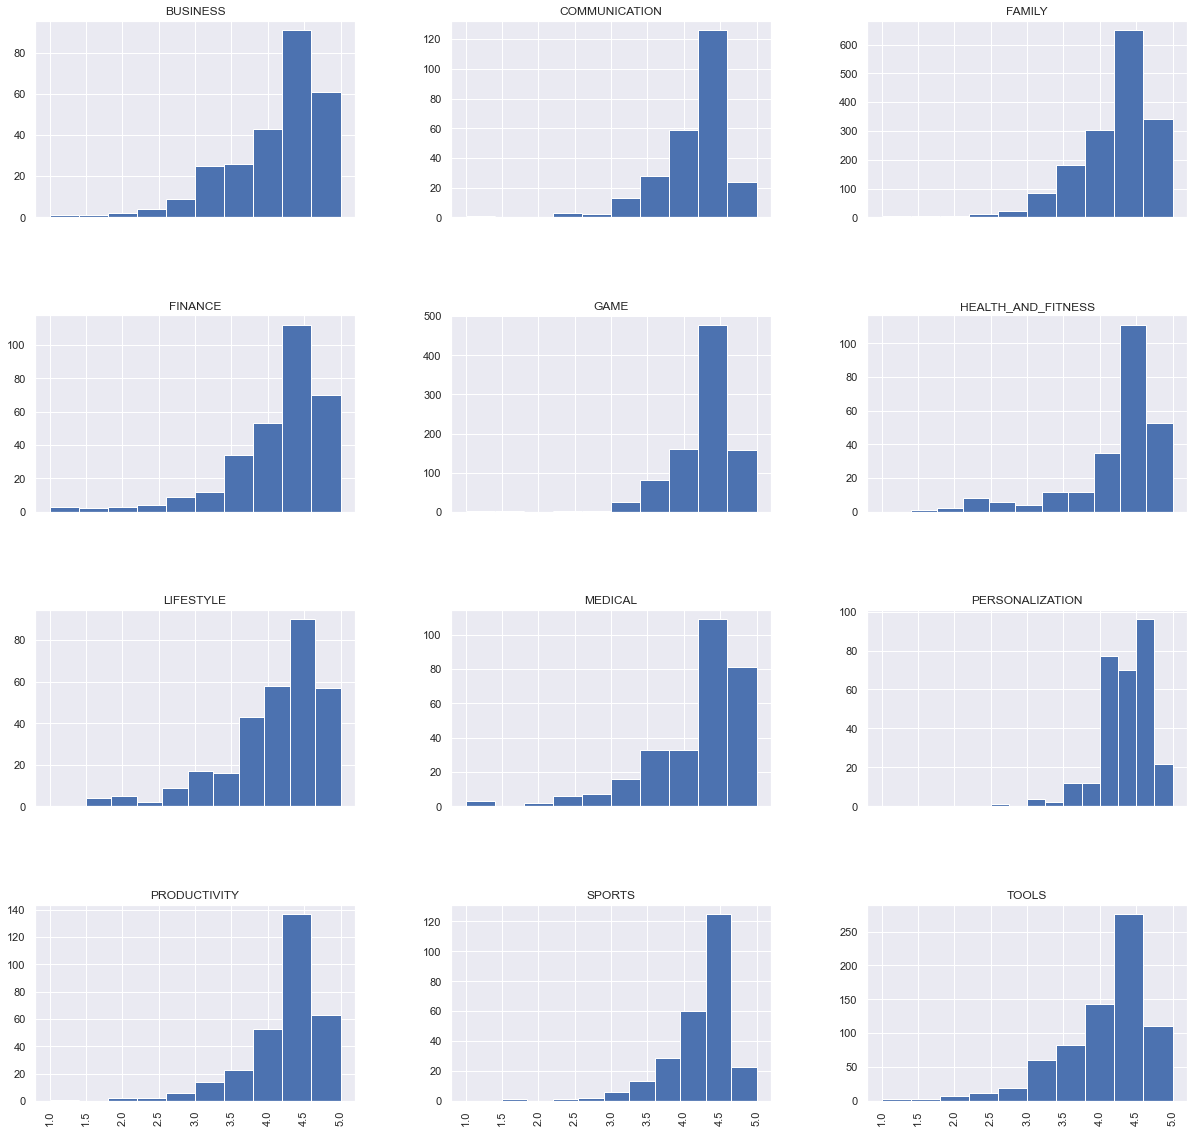

In [31]:
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis that not all group means are equal..\n')

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index() 
# filtering number of apps in one category to be less tha 286

array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))
# In case subplots=True, share x axis and set some x axis labels to invisible
# y-axis shows number of apps in each category and coming x-axis shows rating

# Sizing Strategy - Light Vs Bulky?

How do app sizes impact the app rating?

In [32]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

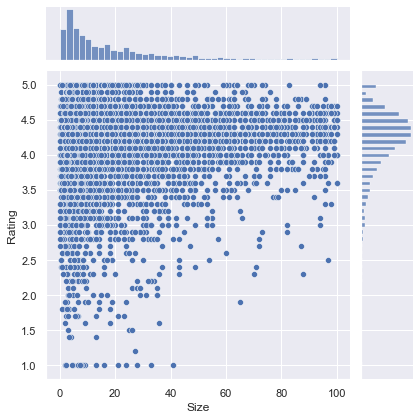

In [33]:
sns.set_style("darkgrid")
ax = sns.jointplot(x='Size', y='Rating', data=df)

Most top rated apps are optimally sized between **~2MB to ~40MB** - neither too light nor too heavy.

# Pricing Strategy - Free Vs Paid?
How do app prices impact app rating?

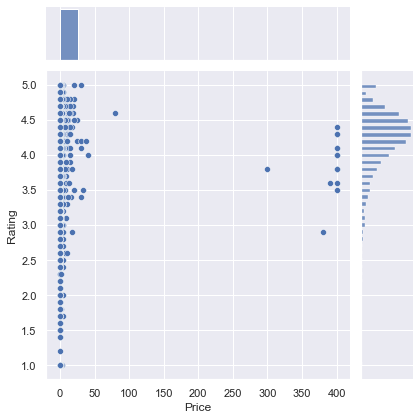

In [34]:
ax = sns.jointplot(x='Price', y='Rating', data=df)

Most top rated apps are optimally priced between **~1\$  to ~25\$**. There are only a very few apps priced above 25\$.

## Current pricing trend - How to price your app?

<AxesSubplot:xlabel='Price', ylabel='Category'>

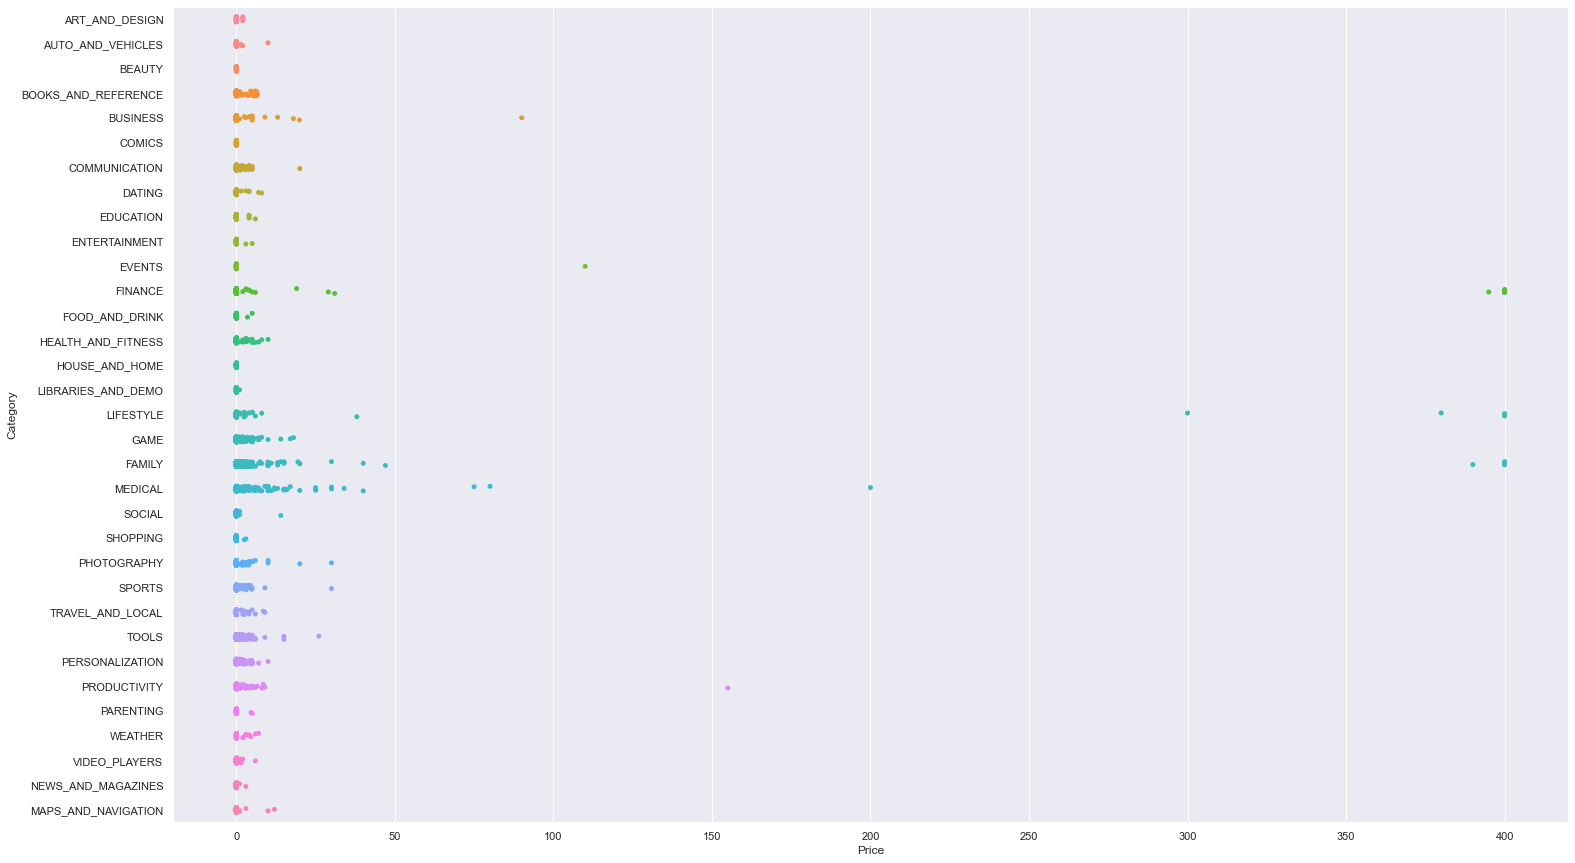

In [35]:
# sns.swarmplot(x="Price", y="Category", data=df)-----gives UserWarnings, instead use stripplot
sns.stripplot(x="Price", y="Category", data=df)

Finance, Lifestyle, Family apps are priced really high (above 250), lets see what apps are those

In [36]:
df[["Category", "App","Price"]].query('Price>250')

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


So these are junk apps, and after filtering them and zooming into price range:

<AxesSubplot:xlabel='Price', ylabel='Category'>

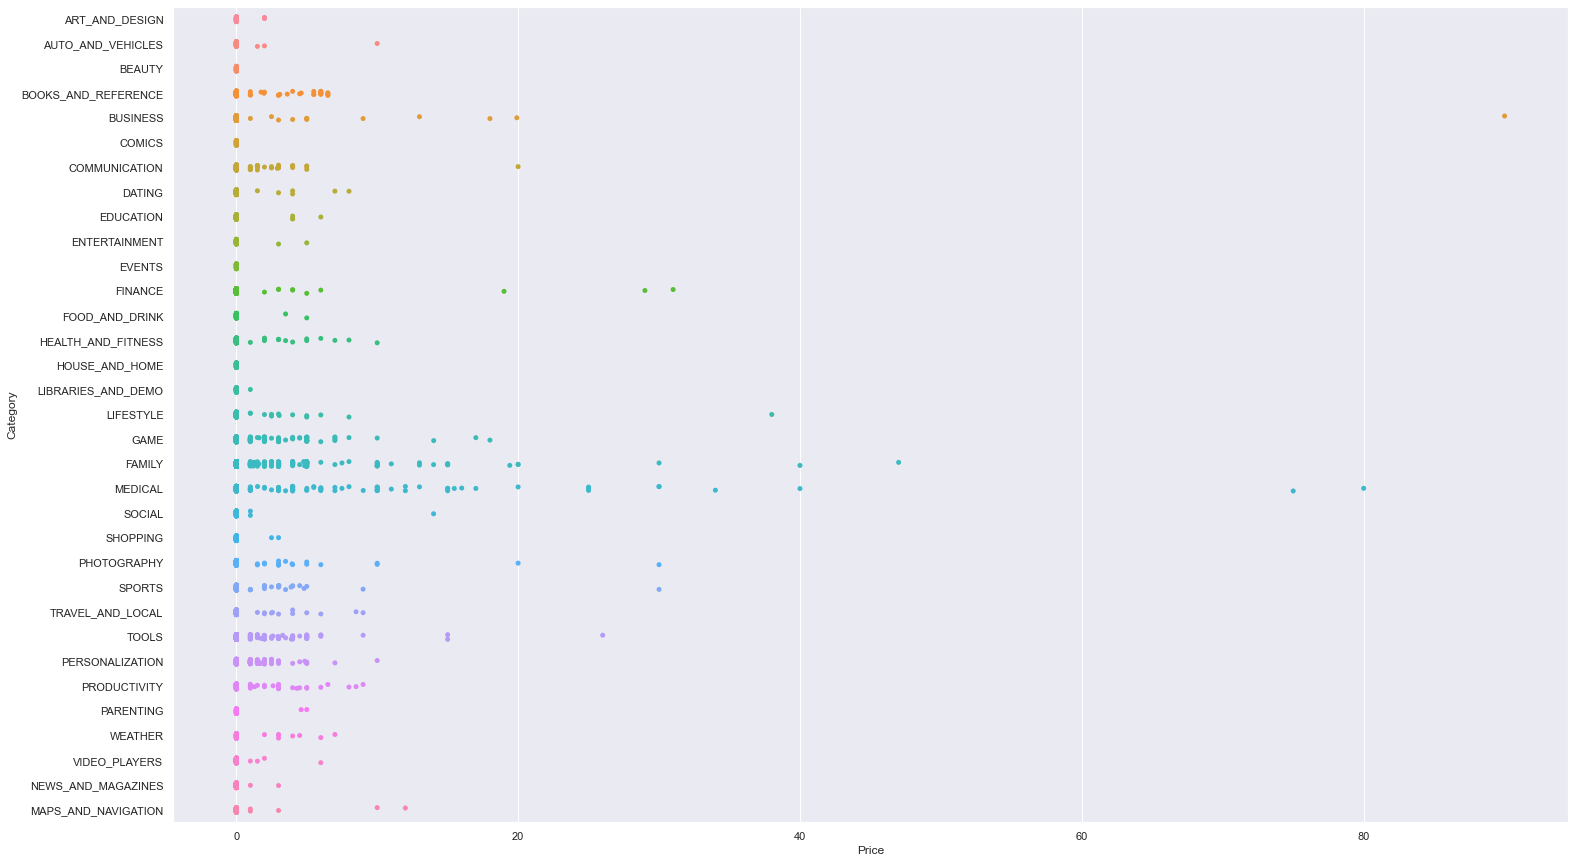

In [37]:
filtered_df=df[df.Price<100]
sns.stripplot(x="Price", y="Category", data=filtered_df, jitter=True)

only Medical and Family apps are the most expensive and some medical apps are priced even upto 80<br>
All other apps are priced under 30 <br>
Game apps are suprisingly under 20$

# Are paid apps downloaded as much as free apps?

In [41]:
df_with_installs=df[df["Installs"]>0]
# df_with_installs
# print(np.log10(df_with_installs['Installs'][df_with_installs.Type==1]))


trace0 = go.Box(
    y=np.log10(df_with_installs['Installs'][df_with_installs.Type=="Paid"]),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df_with_installs['Installs'][df_with_installs.Type=="Free"]),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

**Paid apps have a relatively lower number of downloads than free apps.** However, it is not too bad.

# How do the ratings and sizes of paid apps vary?

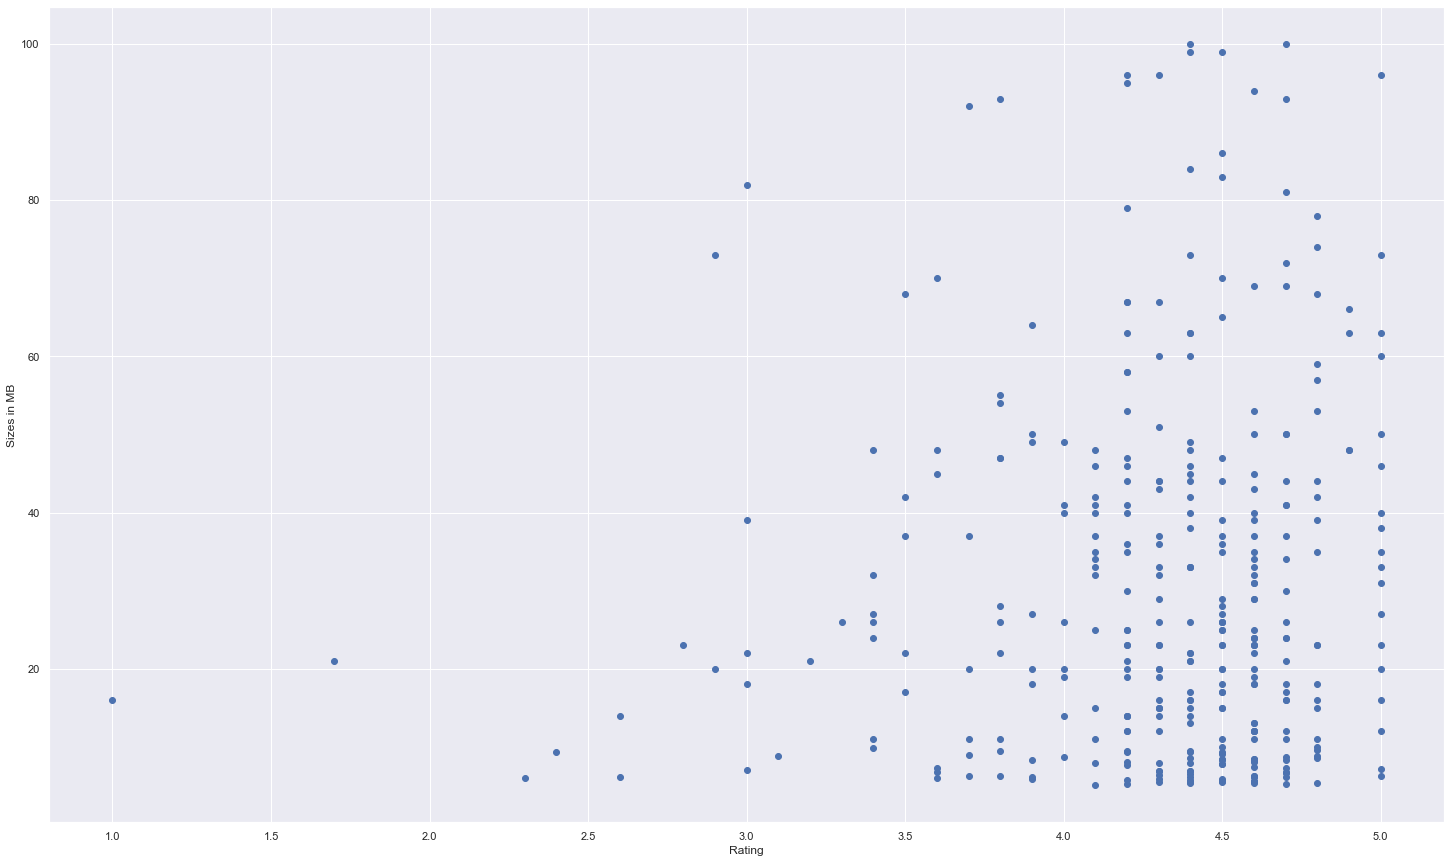

In [42]:
df_paid_apps= df[df["Type"]=="Paid"]
df_paid_apps=df_paid_apps[df_paid_apps.Size>5]
x= df_paid_apps["Rating"]
y= df_paid_apps["Size"]
plt.scatter(x,y)
plt.xlabel("Rating")
plt.ylabel("Sizes in MB")
plt.show()

- **Majority of the paid apps that are highly rated have small sizes.** This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.


- **Users prefer to pay for apps that are light-weighted.** A paid app that is bulky may not perform well in the market.

# Exploring Correlations

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.055076  0.062972  0.040131 -0.021215
Reviews   0.055076  1.000000  0.179276  0.625158 -0.007603
Size      0.062972  0.179276  1.000000  0.134215 -0.022492
Installs  0.040131  0.625158  0.134215  1.000000 -0.009412
Price    -0.021215 -0.007603 -0.022492 -0.009412  1.000000


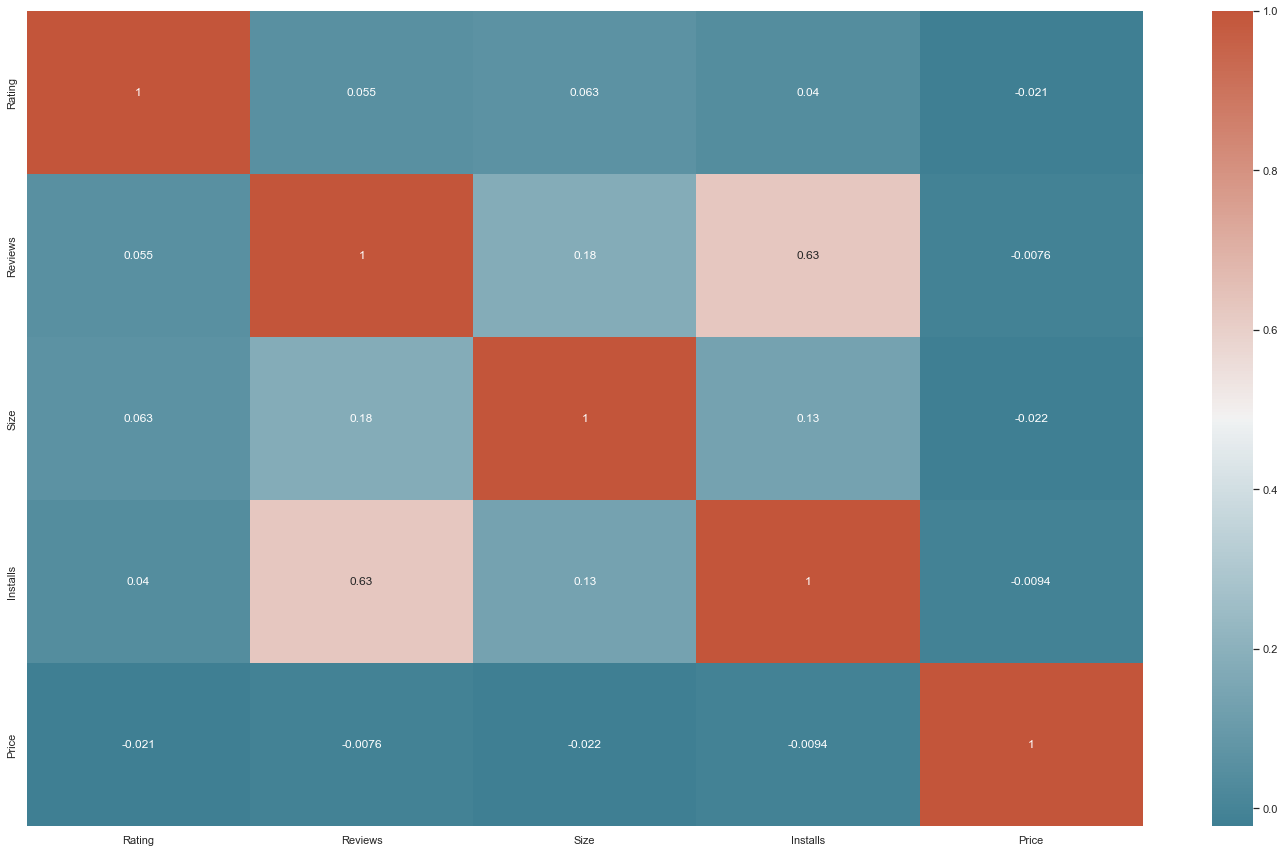

In [44]:
corrmat= df.corr()
print(corrmat)
sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [55]:
print(df.query('Reviews<=10').shape)
print(df.query('Installs==0').shape)

(1870, 13)
(15, 13)


D:\ANACONDA\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10



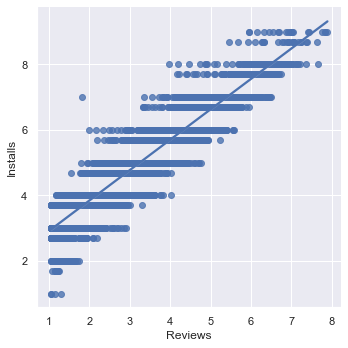

In [56]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot(x="Reviews", y="Installs", data=df_copy)

**A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads.** This means that customers tend to download a given app more if it has been reviewed by a larger number of people. 

This also means that many active users who download an app usually also leave back a review or feedback. 

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

# Basic sentiment analysis - User reviews 

In [3]:
reviews_df= pd.read_csv('D:\CSV\data Science Proj 1-app_market\googleplaystore_user_reviews.csv')
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [57]:
reviews_df.shape

(64295, 5)

In [58]:
merged_df = pd.merge(df, reviews_df, on = "App", how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [150]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [153]:
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
print(grouped_sentiment_category_count)
grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(grouped_sentiment_category_sum.head())
new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
print(new_df)  #--has number of apps in pos, neu, neg setiment and totals numner of apps in tht category

             Category Sentiment  App
0      ART_AND_DESIGN  Negative   61
1      ART_AND_DESIGN   Neutral   62
2      ART_AND_DESIGN  Positive  259
3   AUTO_AND_VEHICLES  Negative   17
4   AUTO_AND_VEHICLES   Neutral   36
..                ...       ...  ...
94      VIDEO_PLAYERS   Neutral   58
95      VIDEO_PLAYERS  Positive  190
96            WEATHER  Negative   28
97            WEATHER   Neutral   31
98            WEATHER  Positive  142

[99 rows x 3 columns]
              Category  Sentiment
0       ART_AND_DESIGN        382
1    AUTO_AND_VEHICLES        289
2               BEAUTY        338
3  BOOKS_AND_REFERENCE        651
4             BUSINESS       1082
             Category Sentiment_x  App  Sentiment_y
0      ART_AND_DESIGN    Negative   61          382
1      ART_AND_DESIGN     Neutral   62          382
2      ART_AND_DESIGN    Positive  259          382
3   AUTO_AND_VEHICLES    Negative   17          289
4   AUTO_AND_VEHICLES     Neutral   36          289
..               

In [154]:
# normalizing by diving numner of negative apps /total number of apps in tht category, similarly for positive and neutral.
new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)
new_df


,Category,Sentiment_x,App,Sentiment_y,Sentiment_Normalized
0,ART_AND_DESIGN,Negative,61,382,0.159686
1,ART_AND_DESIGN,Neutral,62,382,0.162304
2,ART_AND_DESIGN,Positive,259,382,0.678010
3,AUTO_AND_VEHICLES,Negative,17,289,0.058824
4,AUTO_AND_VEHICLES,Neutral,36,289,0.124567
...,...,...,...,...,...
94,VIDEO_PLAYERS,Neutral,58,331,0.175227
95,VIDEO_PLAYERS,Positive,190,331,0.574018
96,WEATHER,Negative,28,201,0.139303
97,WEATHER,Neutral,31,201,0.154229


In [167]:
print(list(new_df.Category[::3])[6:-5] )  #---after removing first 6 and last 5 categories
print(list(new_df.Category[::3])[:7])     #---first 6
list(new_df.Category[::3])[-5:]  #---last 5

['COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL']
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION']


['SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [151]:
# zoomed in some of selected categories
trace1 = go.Bar(        
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[::3][6:-5], #--------Positive sentiment
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(       
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[1::3][6:-5], #---------neutral sentiments
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(       
    x=list(new_df.Category[::3])[6:-5],
    y= new_df.Sentiment_Normalized[2::3][6:-5], #---------positive sentiments
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

- **Health and Fitness, Events, Education** apps perform the best, having more than **77% positive reviews**.


- On the contrary, many **Game and Social** apps perform bad leading to **50% positive and 50% negative**.

In [169]:
# showing all categories
trace1 = go.Bar(        
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[::3], #--------Positive sentiment
    name='Negative',
    marker=dict(color = 'rgb(209,49,20)')
)

trace2 = go.Bar(       
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[1::3], #---------neutral sentiments
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(       
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[2::3], #---------positive sentiments
    name='Positive',
    marker=dict(color = 'rgb(49,189,120)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

In [171]:
print(grouped_sentiment_category_count[grouped_sentiment_category_count.Category=="AUTO_AND_VEHICLES"])
print(grouped_sentiment_category_count[grouped_sentiment_category_count.Category=="COMICS"])
print(grouped_sentiment_category_count[grouped_sentiment_category_count.Category=="FAMILY"])

            Category Sentiment  App
3  AUTO_AND_VEHICLES  Negative   17
4  AUTO_AND_VEHICLES   Neutral   36
5  AUTO_AND_VEHICLES  Positive  236
   Category Sentiment  App
15   COMICS  Negative    1
16   COMICS   Neutral    5
17   COMICS  Positive   39
   Category Sentiment   App
33   FAMILY  Negative   552
34   FAMILY   Neutral   208
35   FAMILY  Positive  1249


- Even though there are less number of apps in **Auto and vehicles and comics category**, its distribution of **positive sentiment/reviews is about 80%**